thyroid dataset

In [346]:
import keras
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
## Importing required libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
%matplotlib inline

# Define function for plotting history
import matplotlib.pyplot as plt
def plot_metrics(history, metrics =  ['loss', 'acc']):
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    #plt.figsize=(20,10)
    plt.subplot(1,len(metrics),n+1)
    plt.tight_layout(pad=2)
    plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    plt.legend()
    
import sklearn
import seaborn as sns
#from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
def plot_cm(labels, predictions):
  cmdf = pd.DataFrame()confusion_matrix(labels, predictions)

  print(cm)
  plt.figure(figsize=(8,8))
  sns.heatmap(cm_df, annot=True, fmt="d")
  plt.title('Confusion Matrix')
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

import pandas as pd
train = pd.read_csv('ann-train.data', header=None, sep=" ") 
y_train=train[21]
train.drop([21,22,23],axis=1, inplace=True)
train.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.73,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0.00060,0.015,0.120,0.082,0.146
1,0.24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.00025,0.030,0.143,0.133,0.108
2,0.47,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.00190,0.024,0.102,0.131,0.078
3,0.64,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.00090,0.017,0.077,0.090,0.085
4,0.23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.00025,0.026,0.139,0.090,0.153


In [299]:
print("Classes -> number of representatives:")
print(y_train.value_counts())
times_class1 = y_train.value_counts()[3]//y_train.value_counts()[1]
times_class2 = y_train.value_counts()[3]//y_train.value_counts()[2]
print("Times more needed for class 1 -> ", times_class1)
print("Times more needed for class 2 -> ", times_class2)

Classes -> number of representatives:
3    3488
2     191
1      93
Name: 21, dtype: int64
Times more needed for class 1 ->  37
Times more needed for class 2 ->  18


Create more records for underrepresented classes 

In [300]:

class1indexes = y_train.loc[y_train == 1]
class2indexes = y_train.loc[y_train == 2]

#class2indexes.head()

class1 = train.loc[class1indexes.index]
class2 = train.loc[class2indexes.index]
print("Class 1: ",class1.shape)
print("Class 2: ",class2.shape)
pad1 = class1.reset_index(drop=True)
#print(pad.shape)
pad1 = pd.concat([pad1 for i in range(times_class1-1)],
          ignore_index=True)

pad1[21] = pd.Series(1, index=pad1.index) # add class label 1
#class1labels = 
print("Shape of padded class 1 with label: ", pad1.shape)
#pad1.head()
pad2 = class2.reset_index(drop=True)
pad2 = pd.concat([pad2 for i in range(times_class2-1)],
          ignore_index=True)

pad2[21] = pd.Series(2, index=pad2.index) # add class label 1
print("Shape of padded class 2 with label: ", pad2.shape)
pad2.head()

Class 1:  (93, 21)
Class 2:  (191, 21)
Shape of padded class 1 with label:  (3348, 22)
Shape of padded class 2 with label:  (3247, 22)


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.62,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0.01100,0.008,0.073,0.074,0.09800,2
1,0.61,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0.00979,0.004,0.081,0.064,0.12600,2
2,0.56,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0.00820,0.020,0.066,0.094,0.07000,2
3,0.78,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00630,0.011,0.056,0.086,0.06500,2
4,0.69,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00680,0.022,0.077,0.100,0.07692,2


Append repeated records of class 1 and 2  to the training dataframe.


In [301]:
print("Training data shape: ",train.shape)
train[21] = y_train
print("Training data shape with yZ: ",train.shape)
train = train.append(pad1,ignore_index=True).append(pad2,ignore_index=True).sample(frac=1)
print("New Training data shape with yZ: ",train.shape)
train.head()

Training data shape:  (3772, 21)
Training data shape with yZ:  (3772, 22)
New Training data shape with yZ:  (10367, 22)


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
5241,0.28,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0.10300,0.0208,0.065,0.116,0.056,1
67,0.72,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00160,0.0220,0.107,0.112,0.096,3
3039,0.69,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00190,0.0150,0.126,0.096,0.131,3
6391,0.24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.06500,0.0070,0.028,0.100,0.028,1
7973,0.71,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0.00939,0.0140,0.077,0.089,0.087,2


In [302]:
# keep the class labels of training dataframe
y_train=train[21]
print("yZ of training data shape: ",y_train.shape)
# remove lables from training dataframe
train.drop([21],axis=1, inplace=True)
print("training data shape: ",train.shape)
print("Classes -> number of representatives:")
print(y_train.value_counts())


yZ of training data shape:  (10367,)
training data shape:  (10367, 21)
Classes -> number of representatives:
3    3488
1    3441
2    3438
Name: 21, dtype: int64


In [303]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(train)
train_scaled_features = pd.DataFrame(scaled_features, index=train.index, columns=train.columns)
train_scaled_features.head()


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
5241,-1.223938,-0.585853,-0.287013,-0.098691,-0.076297,-0.181891,-0.071684,9.015419,-0.132927,-0.34260,...,-0.059031,-0.05651,-0.163214,-0.009822,-0.179041,0.869882,0.607033,-0.334334,0.828502,-0.567064
67,1.090471,-0.585853,-0.287013,-0.098691,-0.076297,-0.181891,-0.071684,-0.110921,-0.132927,-0.34260,...,-0.059031,-0.05651,-0.163214,-0.009822,-0.179041,-0.451938,0.756767,0.669141,0.608426,0.393952
3039,0.932671,-0.585853,-0.287013,-0.098691,-0.076297,-0.181891,-0.071684,-0.110921,-0.132927,-0.34260,...,-0.059031,-0.05651,-0.163214,-0.009822,-0.179041,-0.448028,-0.116682,1.123093,-0.271879,1.234842
6391,-1.434339,-0.585853,-0.287013,-0.098691,-0.076297,-0.181891,-0.071684,-0.110921,-0.132927,-0.34260,...,-0.059031,-0.05651,-0.163214,-0.009822,-0.179041,0.374526,-1.114909,-1.218347,-0.051803,-1.239776
7973,1.037871,-0.585853,-0.287013,-0.098691,-0.076297,-0.181891,-0.071684,-0.110921,-0.132927,2.91886,...,-0.059031,-0.05651,-0.163214,-0.009822,-0.179041,-0.350390,-0.241460,-0.047627,-0.657012,0.177724


In [304]:
train_scaled_features.describe()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
count,1.036700e+04,1.036700e+04,1.036700e+04,1.036700e+04,1.036700e+04,1.036700e+04,1.036700e+04,1.036700e+04,1.036700e+04,1.036700e+04,...,1.036700e+04,1.036700e+04,1.036700e+04,1.036700e+04,1.036700e+04,1.036700e+04,1.036700e+04,1.036700e+04,1.036700e+04,1.036700e+04
mean,2.542793e-16,-4.420759e-17,1.507856e-17,-1.713472e-17,-5.483112e-18,-3.289867e-17,2.947173e-17,-1.919089e-17,-2.535939e-17,-1.370778e-17,...,-1.953359e-17,-2.741556e-17,-4.009525e-17,-1.370778e-18,6.237040e-17,-2.930038e-17,-2.883774e-16,4.866262e-17,7.539279e-18,1.130892e-16
std,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,...,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00
min,-2.644144e+00,-5.858529e-01,-2.870127e-01,-9.869115e-02,-7.629736e-02,-1.818906e-01,-7.168435e-02,-1.109211e-01,-1.329270e-01,-3.425995e-01,...,-5.903099e-02,-5.650967e-02,-1.632144e-01,-9.821875e-03,-1.790412e-01,-4.727955e-01,-1.925968e+00,-1.839545e+00,-4.508346e+00,-1.864437e+00
25%,-8.031364e-01,-5.858529e-01,-2.870127e-01,-9.869115e-02,-7.629736e-02,-1.818906e-01,-7.168435e-02,-1.109211e-01,-1.329270e-01,-3.425995e-01,...,-5.903099e-02,-5.650967e-02,-1.632144e-01,-9.821875e-03,-1.790412e-01,-4.456812e-01,-7.405735e-01,-7.405017e-01,-6.570125e-01,-6.871914e-01
50%,1.436676e-01,-5.858529e-01,-2.870127e-01,-9.869115e-02,-7.629736e-02,-1.818906e-01,-7.168435e-02,-1.109211e-01,-1.329270e-01,-3.425995e-01,...,-5.903099e-02,-5.650967e-02,-1.632144e-01,-9.821875e-03,-1.790412e-01,-3.503902e-01,1.328751e-01,9.572689e-02,-5.180293e-02,1.056473e-01
75%,7.748702e-01,1.706913e+00,-2.870127e-01,-9.869115e-02,-7.629736e-02,-1.818906e-01,-7.168435e-02,-1.109211e-01,-1.329270e-01,-3.425995e-01,...,-5.903099e-02,-5.650967e-02,-1.632144e-01,-9.821875e-03,-1.790412e-01,-6.868852e-02,5.820772e-01,6.452485e-01,5.534066e-01,6.822572e-01
max,2.247676e+00,1.706913e+00,3.484167e+00,1.013262e+01,1.310661e+01,5.497809e+00,1.395005e+01,9.015419e+00,7.522928e+00,2.918860e+00,...,1.694025e+01,1.769609e+01,6.126911e+00,1.018136e+02,5.585307e+00,6.436130e+00,1.122567e+01,8.386336e+00,7.210712e+00,1.279107e+01


In [337]:
test = pd.read_csv('ann-test.data', header=None, sep=" ") 
y_test=test[21]
test.drop([21,22,23],axis=1, inplace=True)
test.head()
print("test data shape: ",test.shape)
print("Classes -> number of representatives:")
print(y_test.value_counts())

test data shape:  (3428, 21)
Classes -> number of representatives:
3    3178
2     177
1      73
Name: 21, dtype: int64


In [338]:
## Changing labels to one-hot encoded vector

lb = LabelBinarizer()
y_train_one_hot = lb.fit_transform(y_train)
y_test_one_hot = lb.transform(y_test)
print('Train labels dimension:');print(y_train_one_hot.shape)
print('Test labels dimension:');print(y_test_one_hot.shape)
print(y_train_one_hot[100])

Train labels dimension:
(10367, 3)
Test labels dimension:
(3428, 3)
[0 0 1]


In [324]:
# Defining various initialization parameters for 21-32-32-1 MLP model
from keras.metrics import categorical_accuracy

num_classes = y_train_one_hot.shape[1]; num_features = train.shape[1]
num_layers_0 = 32; num_layers_1 = 32

# Define the keras model
model = Sequential()
model.add(Dense(num_layers_0, input_dim=num_features, activation='relu'))
model.add(Dense(num_layers_1, activation='relu'))
model.add(Dense(num_classes, activation='sigmoid'))

# Compile the keras model
model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['categorical_accuracy'])
# Fit keras model
history = model.fit(train, y_train_one_hot, epochs=128, batch_size=8, validation_split = 0.20)

Train on 8293 samples, validate on 2074 samples
Epoch 1/128
8293/8293 [==============================] - 3s 375us/step - loss: 0.3882 - categorical_accuracy: 0.7085 - val_loss: 0.2896 - val_categorical_accuracy: 0.7850
Epoch 2/128
8293/8293 [==============================] - 2s 218us/step - loss: 0.2732 - categorical_accuracy: 0.8031 - val_loss: 0.2602 - val_categorical_accuracy: 0.8274
Epoch 3/128
8293/8293 [==============================] - 2s 237us/step - loss: 0.2387 - categorical_accuracy: 0.8301 - val_loss: 0.2073 - val_categorical_accuracy: 0.8766
Epoch 4/128
8293/8293 [==============================] - 3s 315us/step - loss: 0.1814 - categorical_accuracy: 0.8968 - val_loss: 0.1579 - val_categorical_accuracy: 0.9267
Epoch 5/128
8293/8293 [==============================] - 2s 299us/step - loss: 0.1230 - categorical_accuracy: 0.9455 - val_loss: 0.1129 - val_categorical_accuracy: 0.9441
Epoch 6/128
8293/8293 [==============================] - 2s 282us/step - loss: 0.0874 - categoric

8293/8293 [==============================] - 2s 198us/step - loss: 0.0195 - categorical_accuracy: 0.9914 - val_loss: 0.0494 - val_categorical_accuracy: 0.9836
Epoch 49/128
8293/8293 [==============================] - 2s 197us/step - loss: 0.0204 - categorical_accuracy: 0.9898 - val_loss: 0.0388 - val_categorical_accuracy: 0.9904
Epoch 50/128
8293/8293 [==============================] - 2s 194us/step - loss: 0.0167 - categorical_accuracy: 0.9920 - val_loss: 0.0339 - val_categorical_accuracy: 0.9908
Epoch 51/128
8293/8293 [==============================] - 2s 197us/step - loss: 0.0185 - categorical_accuracy: 0.9919 - val_loss: 0.0312 - val_categorical_accuracy: 0.9937
Epoch 52/128
8293/8293 [==============================] - 2s 199us/step - loss: 0.0234 - categorical_accuracy: 0.9898 - val_loss: 0.0327 - val_categorical_accuracy: 0.9918
Epoch 53/128
8293/8293 [==============================] - 2s 202us/step - loss: 0.0167 - categorical_accuracy: 0.9922 - val_loss: 0.0316 - val_categorica

Epoch 96/128
8293/8293 [==============================] - 2s 206us/step - loss: 0.0134 - categorical_accuracy: 0.9941 - val_loss: 0.0324 - val_categorical_accuracy: 0.9884
Epoch 97/128
8293/8293 [==============================] - 2s 199us/step - loss: 0.0115 - categorical_accuracy: 0.9931 - val_loss: 0.0599 - val_categorical_accuracy: 0.9773
Epoch 98/128
8293/8293 [==============================] - 2s 202us/step - loss: 0.0109 - categorical_accuracy: 0.9941 - val_loss: 0.0283 - val_categorical_accuracy: 0.9923
Epoch 99/128
8293/8293 [==============================] - 2s 223us/step - loss: 0.0109 - categorical_accuracy: 0.9951 - val_loss: 0.0317 - val_categorical_accuracy: 0.9932
Epoch 100/128
8293/8293 [==============================] - 2s 206us/step - loss: 0.0099 - categorical_accuracy: 0.9949 - val_loss: 0.0296 - val_categorical_accuracy: 0.9932
Epoch 101/128
8293/8293 [==============================] - 2s 201us/step - loss: 0.0132 - categorical_accuracy: 0.9937 - val_loss: 0.0299 -

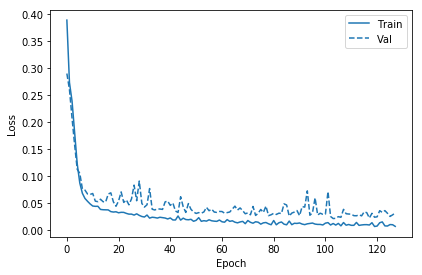

In [326]:
# Plot the training/validation history of our Keras model
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plot_metrics(history,  metrics =  ['loss'])

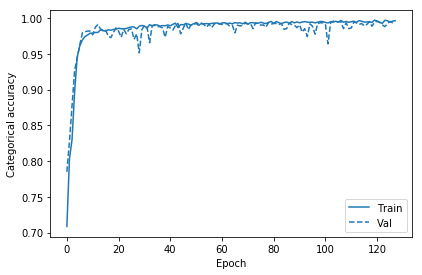

In [327]:
plot_metrics(history,  metrics =  ['categorical_accuracy']) 

In [331]:
y_test_predictions = model.predict_classes(test, batch_size=1)
baseline_results = model.evaluate(test, y_test_one_hot,
                                  batch_size=8, verbose=0)

#y_test_predictions_one_hot = lb.transform(y_test_predictions)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
  print()
    
print(baseline_results)


loss :  0.11681554332876518

categorical_accuracy :  0.971120186697783

[0.11681554332876518, 0.971120186697783]


In [332]:
#y_test_predictions = y_test_predictions+1
y_test_predictions

array([1, 2, 2, ..., 2, 2, 2])

In [333]:
y_test.values

array([2, 3, 3, ..., 3, 3, 3])

[[  66    5    2]
 [   0  169    8]
 [  13   71 3094]]
Classes -> number of representatives:
3    3178
2     177
1      73
Name: 21, dtype: int64


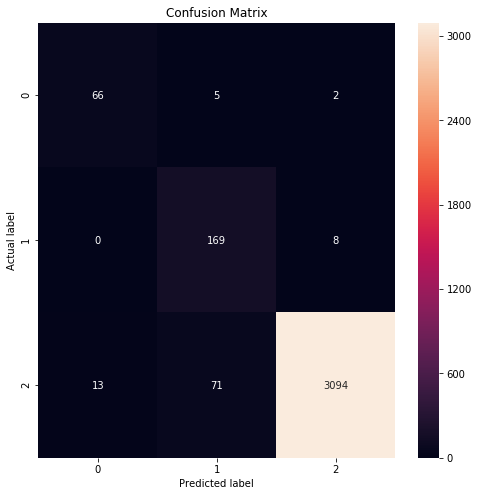

In [347]:
plot_cm(y_test.values, y_test_predictions+1)
print("Classes -> number of representatives:")
print(y_test.value_counts())

3 dense layers model

In [295]:
num_classes = y_train_one_hot.shape[1]
num_features = train.shape[1]
# Define the keras model 21-32-64-32-1 MLP model
model2 = Sequential()
model2.add(Dense(16, input_dim=num_features, activation='sigmoid'))
model2.add(Dense(32, activation='linear'))
model2.add(Dense(16, activation='sigmoid'))
model2.add(Dense(num_classes, activation='tanh'))

# Compile the keras model
model2.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['mean_squared_logarithmic_error','accuracy','binary_accuracy'])
# Fit keras model
history2 = model2.fit(train, y_train_one_hot, epochs=128, validation_split = 0.20)

Train on 3017 samples, validate on 755 samples
Epoch 1/128
3017/3017 [==============================] - 1s 398us/step - loss: 0.5111 - mean_squared_logarithmic_error: 0.0259 - acc: 0.2940 - binary_accuracy: 0.2940 - val_loss: 0.5784 - val_mean_squared_logarithmic_error: 0.0271 - val_acc: 0.3038 - val_binary_accuracy: 0.3038
Epoch 2/128
3017/3017 [==============================] - 0s 54us/step - loss: 0.4745 - mean_squared_logarithmic_error: 0.0222 - acc: 0.3094 - binary_accuracy: 0.3094 - val_loss: 0.5763 - val_mean_squared_logarithmic_error: 0.0272 - val_acc: 0.3038 - val_binary_accuracy: 0.3038
Epoch 3/128
3017/3017 [==============================] - 0s 64us/step - loss: 0.4728 - mean_squared_logarithmic_error: 0.0222 - acc: 0.3094 - binary_accuracy: 0.3094 - val_loss: 0.5764 - val_mean_squared_logarithmic_error: 0.0273 - val_acc: 0.3038 - val_binary_accuracy: 0.3038
Epoch 4/128
3017/3017 [==============================] - 0s 81us/step - loss: 0.4724 - mean_squared_logarithmic_error:

3017/3017 [==============================] - 0s 52us/step - loss: 0.4723 - mean_squared_logarithmic_error: 0.0223 - acc: 0.3094 - binary_accuracy: 0.3094 - val_loss: 0.5769 - val_mean_squared_logarithmic_error: 0.0273 - val_acc: 0.3038 - val_binary_accuracy: 0.3038
Epoch 31/128
3017/3017 [==============================] - 0s 44us/step - loss: 0.4723 - mean_squared_logarithmic_error: 0.0223 - acc: 0.3094 - binary_accuracy: 0.3094 - val_loss: 0.5769 - val_mean_squared_logarithmic_error: 0.0273 - val_acc: 0.3038 - val_binary_accuracy: 0.3038
Epoch 32/128
3017/3017 [==============================] - 0s 52us/step - loss: 0.4723 - mean_squared_logarithmic_error: 0.0223 - acc: 0.3094 - binary_accuracy: 0.3094 - val_loss: 0.5769 - val_mean_squared_logarithmic_error: 0.0273 - val_acc: 0.3038 - val_binary_accuracy: 0.3038
Epoch 33/128
3017/3017 [==============================] - 0s 53us/step - loss: 0.4723 - mean_squared_logarithmic_error: 0.0223 - acc: 0.3094 - binary_accuracy: 0.3094 - val_los

3017/3017 [==============================] - 0s 53us/step - loss: 0.4723 - mean_squared_logarithmic_error: 0.0223 - acc: 0.3094 - binary_accuracy: 0.3094 - val_loss: 0.5768 - val_mean_squared_logarithmic_error: 0.0273 - val_acc: 0.3038 - val_binary_accuracy: 0.3038
Epoch 60/128
3017/3017 [==============================] - 0s 50us/step - loss: 0.4723 - mean_squared_logarithmic_error: 0.0223 - acc: 0.3094 - binary_accuracy: 0.3094 - val_loss: 0.5768 - val_mean_squared_logarithmic_error: 0.0273 - val_acc: 0.3038 - val_binary_accuracy: 0.3038
Epoch 61/128
3017/3017 [==============================] - 0s 49us/step - loss: 0.4723 - mean_squared_logarithmic_error: 0.0222 - acc: 0.3094 - binary_accuracy: 0.3094 - val_loss: 0.5769 - val_mean_squared_logarithmic_error: 0.0273 - val_acc: 0.3038 - val_binary_accuracy: 0.3038
Epoch 62/128
3017/3017 [==============================] - 0s 58us/step - loss: 0.4723 - mean_squared_logarithmic_error: 0.0222 - acc: 0.3094 - binary_accuracy: 0.3094 - val_los

3017/3017 [==============================] - 0s 62us/step - loss: 0.4722 - mean_squared_logarithmic_error: 0.0223 - acc: 0.3094 - binary_accuracy: 0.3094 - val_loss: 0.5767 - val_mean_squared_logarithmic_error: 0.0273 - val_acc: 0.3038 - val_binary_accuracy: 0.3038
Epoch 89/128
3017/3017 [==============================] - 0s 47us/step - loss: 0.4722 - mean_squared_logarithmic_error: 0.0222 - acc: 0.3094 - binary_accuracy: 0.3094 - val_loss: 0.5766 - val_mean_squared_logarithmic_error: 0.0273 - val_acc: 0.3038 - val_binary_accuracy: 0.3038
Epoch 90/128
3017/3017 [==============================] - 0s 47us/step - loss: 0.4722 - mean_squared_logarithmic_error: 0.0222 - acc: 0.3094 - binary_accuracy: 0.3094 - val_loss: 0.5766 - val_mean_squared_logarithmic_error: 0.0273 - val_acc: 0.3038 - val_binary_accuracy: 0.3038
Epoch 91/128
3017/3017 [==============================] - 0s 50us/step - loss: 0.4722 - mean_squared_logarithmic_error: 0.0222 - acc: 0.3094 - binary_accuracy: 0.3094 - val_los

3017/3017 [==============================] - 0s 47us/step - loss: 0.4721 - mean_squared_logarithmic_error: 0.0222 - acc: 0.3094 - binary_accuracy: 0.3094 - val_loss: 0.5766 - val_mean_squared_logarithmic_error: 0.0273 - val_acc: 0.3038 - val_binary_accuracy: 0.3038
Epoch 118/128
3017/3017 [==============================] - 0s 50us/step - loss: 0.4721 - mean_squared_logarithmic_error: 0.0222 - acc: 0.3094 - binary_accuracy: 0.3094 - val_loss: 0.5766 - val_mean_squared_logarithmic_error: 0.0273 - val_acc: 0.3038 - val_binary_accuracy: 0.3038
Epoch 119/128
3017/3017 [==============================] - 0s 49us/step - loss: 0.4721 - mean_squared_logarithmic_error: 0.0222 - acc: 0.3094 - binary_accuracy: 0.3094 - val_loss: 0.5767 - val_mean_squared_logarithmic_error: 0.0273 - val_acc: 0.3038 - val_binary_accuracy: 0.3038
Epoch 120/128
3017/3017 [==============================] - 0s 44us/step - loss: 0.4721 - mean_squared_logarithmic_error: 0.0222 - acc: 0.3094 - binary_accuracy: 0.3094 - val_

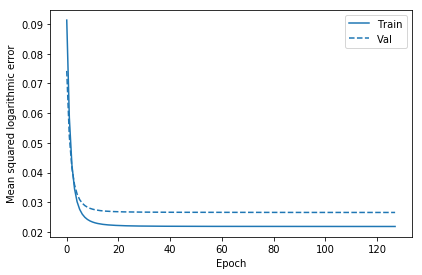

In [113]:
plot_metrics(history2, metrics =  ['mean_squared_logarithmic_error'])

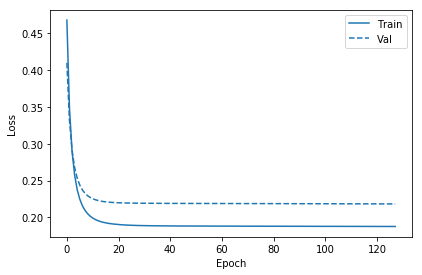

In [114]:
plot_metrics(history2, metrics =  ['loss'])

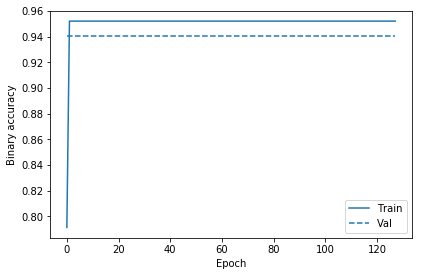

In [115]:
plot_metrics(history2, metrics =  ['binary_accuracy'])

3428/3428 [==============================] - 2s 630us/step
loss :  0.18880256307784082

mean_squared_logarithmic_error :  0.02211659270399299

acc :  0.951380786410986

binary_accuracy :  0.951380786410986

[[   0   73    0]
 [   0  177    0]
 [   0 3178    0]]


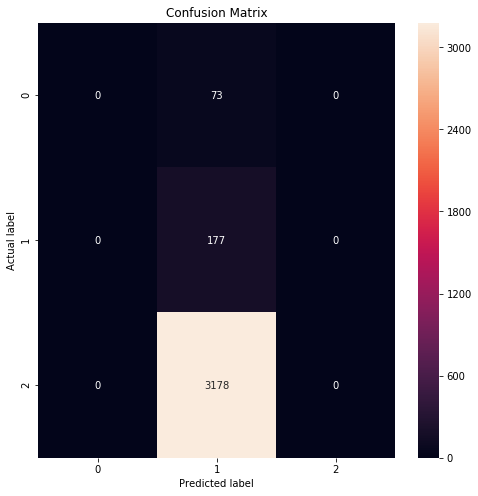

In [116]:
y_test_predictions = model2.predict_classes(test, batch_size=1)
baseline_results = model2.evaluate(test, y_test_one_hot,
                                  batch_size=1, verbose=1)

for name, value in zip(model2.metrics_names, baseline_results):
  print(name, ': ', value)
  print()
    
plot_cm(y_test.values, y_test_predictions+1)
